## Introducing ```numpy``` and arrays

To begin processing image data, we need to understand what's going on behind the scenes.

We can do that using a library called ```numpy```, which stands for __Numerical Python__. 

In general, you should use this library when you want to do fancy mathemtical operations with numbers, especially if you have arrays or matrices.

In [2]:
# tools for interacting with the operating system
import os

# tool fo working with arrays
# creating an abbreviation to save keystrokes
import numpy as np

In [3]:
filepath = os.path.join("..", "data", "sample-data", "sample-data-01.csv")

The expression ```numpy.loadtxt(...)``` is a function call that asks Python to run the function ```loadtxt``` which belongs to the ```numpy``` library. This dotted notation is used everywhere in Python: the thing that appears before the dot contains the thing that appears after.


```numpy.loadtxt``` has two parameters: the name of the file we want to read and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

__Assign to variable__

In [4]:
# load comma separated file
data = np.loadtxt(fname=filepath, delimiter=',')

In [5]:
# inspect array
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [6]:
# print data type
print(type(data))

<class 'numpy.ndarray'>


__numpy.ndarray__ tells us that we are working with an N-dimensional array

In this case, it's 2-dimensional

In [7]:
# print type of data points
print(data.dtype)

float64


In [8]:
# print shape
print(data.shape)

(60, 40)


In [9]:
# check shape
print(60*40)

2400


__Index__

Indexing is similar to lists and strings, but we need to inlcude both row and column

In [10]:
# get first entry
first_value = data[0, 0]

In [11]:
print(f"First value in data: {first_value}")

First value in data: 0.0


__Question:__ What is the middle value of the array?

In [12]:
middle_value = data[30, 20]

Print the value of ```middle_value``` to the screen:

In [13]:
print(f"Middle value in data: {middle_value}")

Middle value in data: 13.0


<img src="../data/viz/python-zero-index.svg">

__Slice__

An index like [30, 20] selects a single element of an array, but we can select whole sections as well. 

For example, we can select the first ten columns of values for the first four rows like this:

In [ ]:
data

In [16]:
# your code here
print(data[0:4, 0:10])

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]


First ten columns, rows five-ten?

In [18]:
print(data[5:11, 0:10])

[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]
 [0. 1. 0. 0. 4. 3. 3. 5. 5. 4.]]


__Select only one row__

In [19]:
data[0,:]

array([ 0.,  0.,  1.,  3.,  1.,  2.,  4.,  7.,  8.,  3.,  3.,  3., 10.,
        5.,  7.,  4.,  7.,  7., 12., 18.,  6., 13., 11., 11.,  7.,  7.,
        4.,  6.,  8.,  8.,  4.,  4.,  5.,  7.,  3.,  4.,  2.,  3.,  0.,
        0.])

__Select only one column__

In [20]:
data[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

__Numpy functions__

```numpy``` comes with a range of built-in methods which allow you to quickly and efficiently calculate descriptive statistics for an array.

In [21]:
# your code here
np.mean(data)

6.14875

In [22]:
# your code here
max_value, min_value, std_dev = np.max(data), np.min(data), np.std(data)

In [27]:
max_value, min_value, std_dev = np.max(data), np.min(data), np.std(data)

5.0

In [ ]:
print(f"Maximum: {max_value}")
print(f"Minimum: {min_value}")
print(f"Standard deviation: {std_dev}")

Show numpy + dot + tab, access full range of options. Show ```help()```

In [ ]:
help(np.count_nonzero)

__Operation across rows__

In [ ]:
print(np.mean(data, axis=0))

In [ ]:
print(np.mean(data, axis=0).shape)

"Average score per day"

__Operation along columns__

"Average score per patient"

<img src="../data/viz/numpy-axes.png">

In [ ]:
print(np.mean(data, axis=1))

In [ ]:
print(np.mean(data, axis=1).shape)

This is a good overview to show how things work wiht ```numpy```:

https://www.sharpsightlabs.com/blog/numpy-axes-explained/

## Basic image processing with OpenCV

We start by loading all of the modules we'll need for this class

In [28]:
# We need to incldue the home directory in our path, so we can read in our own module.
import sys
sys.path.append("..")

In [29]:
# python framework for working with images
import cv2

# some utility functions for plotting images
from utils.imutils import jimshow

__Read image__

We can load an image using a handy function from OpenCV

In [36]:
path_to_image = os.path.join("..", "data", "img", "trex.png")

In [37]:
# load using cv2
image = cv2.imread(path_to_image)

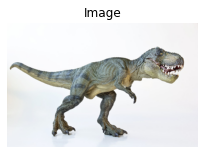

In [38]:
jimshow(image, "Image")

__Save image__

In [39]:
filepath, _ = os.path.split(path_to_image)

In [40]:
outfile = os.path.join(filepath, "new_dino.jpg")

In [41]:
cv2.imwrite(outfile, image)

True

__Inspect image__

In [42]:
print(type(image))

<class 'numpy.ndarray'>


In [43]:
print(image.shape)

(228, 350, 3)


## What is an image?

__Remember how ```numpy``` arrays work!__

ROWSxCOLUMNS == HEIGHTxWIDTH

In [44]:
height = image.shape[0]
width = image.shape[1]

In [45]:
print(f"[INFO] Image height: {height} pixels")
print(f"[INFO] Image width: {width} pixels")

[INFO] Image height: 228 pixels
[INFO] Image width: 350 pixels


In our image, there are 228*350 = 79,800 pixels

__What about the last one?__

In [46]:
image.shape[2]

3

<img src="../data/viz/3-channels.png">

__NB!__

```OpenCV``` stores RGB tuples in REVERSE ORDER

__What colour is a specific pixel?__

In [47]:
# get values of first pixel 
b, g, r = image[0, 0]

In [49]:
print(f"[INFO] pixels at (0, 0) - Red: {r}, Green {g}, Blue: {b}")

[INFO] pixels at (0, 0) - Red: 254, Green 254, Blue: 254


__Modify colour__

In [50]:
image[0, 0] = (0, 0, 255) # remember - blue, green, red!
(b, g, r) = image[0, 0]

In [51]:
print(f"[INFO] pixels at (0, 0) - Red: {r}, Green {g}, Blue: {b}")

[INFO] pixels at (0, 0) - Red: 255, Green 0, Blue: 0


__Image slice__

In [52]:
corner = image[0:100, 0:100]

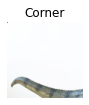

In [53]:
jimshow(corner, "Corner")

__Change corner colour__

In [54]:
image[0:100,0:100] = (0, 0, 255)

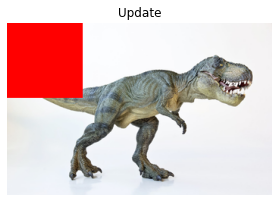

In [55]:
jimshow(image, "Update")

## Exercises

- We saw how to calculate descriptive statistics for a single array. In the data folder, there are more examples of sample data in the folder called [data/sample-data]("../data/sample-data").
  - Write some code which does the following steps:
    - Load every CSV data file in the input folder one at a time
    - For each CSV file, calculate: 
      - The mean, median, and modal values for each patient
        - Create a list of tuples for each CSV 
          - Eg: [(```patient0_mean, patient0_median, patient0_mode```),
                 (```patient1_mean, patient1_median, patient1_mode```),
                 etc, etc]
      - The same as above, but this time calculating the mean, median, and modal values for each day
       